<a href="https://colab.research.google.com/github/Obreintelly/Week_4_IP_Autolib_Data/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_03_Obrein_Telly_Autolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 1:** Loading Libraries and Importing Dataset





# 1.1 Loading the requisite libraries

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

Importing our Autolib Dataset onto Colab

In [122]:
#Lets import our dataset and preview our dataset
url ='http://bit.ly/autolib_dataset'

autolib= pd.read_csv(url)


#1.2 Previewing Our Dataset

In [123]:
#Previewing the first 10 rows
autolib.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


In [124]:
#Previewing the last 10 rows
autolib.tail(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4990,47 boulevard de l'HÃ´pital,0,0,0,0,0,operational,Paris,NaN,paris-hopital-47,STATION,"48.84019, 2.362478",75013,Paris/HÃ´pital/47,operational,NaN,4,station,ok,nonexistent,2018,4,3,21,13
4991,56 avenue du MarÃ©chal de Lattre de Tassigny,5,5,0,0,0,nonexistent,CrÃ©teil,NaN,creteil-marechaldelattredetassigny-56,STATION,"48.79834, 2.455145",94000,CrÃ©teil/MarÃ©chal de Lattre de Tassigny/56,operational,NaN,1,station,ok,nonexistent,2018,4,7,20,43
4992,3 avenue d'Ivry,0,0,0,0,2,operational,Paris,NaN,paris-ivry-3,STATION,"48.82175, 2.36868",75013,Paris/Ivry/3,operational,NaN,6,station,ok,nonexistent,2018,4,9,23,1
4993,6 avenue Charles-de-Gaulle,6,6,0,0,0,nonexistent,Le Plessis-Robinson,NaN,leplessisrobinson-charlesdegaulle-6,STATION,"48.781849, 2.263931",92350,Le Plessis-Robinson/Charles-de-Gaulle/6,operational,NaN,0,station,ok,nonexistent,2018,4,2,4,43
4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,NaN,paris-rocroy-15,STATION,"48.8801236, 2.3509617",75010,Paris/Rocroy/15,operational,NaN,1,station,ok,nonexistent,2018,4,1,20,49
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


1.3 Accessing Information About Our Dataset

In [125]:
#Lets explore our data set
#Ensuring all the columns have been assigned the correct datatypes 
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [126]:
#viewing the columns of this dataframe to get familiar with the dataset before working on it
autolib.columns.values.tolist()



['Address',
 'Cars',
 'Bluecar counter',
 'Utilib counter',
 'Utilib 1.4 counter',
 'Charge Slots',
 'Charging Status',
 'City',
 'Displayed comment',
 'ID',
 'Kind',
 'Geo point',
 'Postal code',
 'Public name',
 'Rental status',
 'Scheduled at',
 'Slots',
 'Station type',
 'Status',
 'Subscription status',
 'year',
 'month',
 'day',
 'hour',
 'minute']

**Section2: Cleaning Our Dataset**

2.1 For Consistency, a bit of feature reworks are needed. The columns for instance will need to be standardized.

In [127]:
#Lets change all columns to upper case, remove any trailing spaces
#The str.strip function is useful in such operations

autolib.columns = autolib.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '_')
autolib.columns

Index(['ADDRESS', 'CARS', 'BLUECAR_COUNTER', 'UTILIB_COUNTER',
       'UTILIB_1_4_COUNTER', 'CHARGE_SLOTS', 'CHARGING_STATUS', 'CITY',
       'DISPLAYED_COMMENT', 'ID', 'KIND', 'GEO_POINT', 'POSTAL_CODE',
       'PUBLIC_NAME', 'RENTAL_STATUS', 'SCHEDULED_AT', 'SLOTS', 'STATION_TYPE',
       'STATUS', 'SUBSCRIPTION_STATUS', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'MINUTE'],
      dtype='object')

In [128]:
autolib.head()

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CHARGE_SLOTS,CHARGING_STATUS,CITY,DISPLAYED_COMMENT,ID,KIND,GEO_POINT,POSTAL_CODE,PUBLIC_NAME,RENTAL_STATUS,SCHEDULED_AT,SLOTS,STATION_TYPE,STATUS,SUBSCRIPTION_STATUS,YEAR,MONTH,DAY,HOUR,MINUTE
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


**2.2 Data Selection**

Research Question: Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018




**2.2.1 Validity**

In [129]:
#Before commencing any data analysis we have to prepare and select the most relevant data for our study. 
#This involves ensuring the columns we maintain in our dataset are useful in the question begin investigated. 
#Equally, the rows should be relevant to the study. 
#Lets explore our individual columns to see what values they contain

In [45]:
autolib["DISPLAYED_COMMENT"].unique()

array([nan, 'Station en parking (niv -1), accÃ¨s 37 rue Leblanc',
       'Station en parking (niv 0), accÃ¨s 26 villa Croix Nivert',
       'Station en parking (niv -2), accÃ¨s 4 av. Foch',
       "Borne d'abonnement en sous-sol (niv -1), accÃ¨s 4 rue Lobau",
       'Station en parking (niv -1), accÃ¨s rue Wilson',
       'Station en parking (niv -1), accÃ¨s Place Georges Pompidou',
       'Station en parking (niv -3), accÃ¨s 32 rue dâ\x80\x99Alsace',
       'Station en parking (niv -2), accÃ¨s 2 avenue Gabriel',
       'Station en parking (niv -1), accÃ¨s av. de Versailles',
       'Station en parking (niv -1), accÃ¨s rue Abel Gance',
       'Station en parking (niv -1), accÃ¨s 4 av. des Ternes',
       'Station en parking (niv -1), Station B (sur la droite)',
       'Station en parking',
       'Station en parking (niv -2), accÃ¨s 125 bvd du Montparnasse',
       'Station en parking (niv -1), Station A (sur la gauche)',
       'Station en parking (niv -1), accÃ¨s 8 rue Louise Michel'

In [130]:
autolib["KIND"].unique()
#We do not need this column for purposes of addressing the research question.

array(['STATION', 'PARKING', 'SPACE', 'CENTER'], dtype=object)

In [20]:
autolib["RENTAL_STATUS"].unique()
#For purpose of investigating the research question, we will only concern ourselves with stations that have an 'operational' rental_status
#Broken, future and non-existent stations will need to be deleted from the dataset

array(['operational', 'broken', 'future', 'nonexistent'], dtype=object)

In [21]:
autolib['SCHEDULED_AT'].unique()
#Relates to the planned opening of stations with a future status. We do not need this in our analysis.

array([nan, '2016-07-27T15:32:21', '2016-07-05T13:10:09',
       '2015-09-29T13:58:29', '2016-04-26T14:28:01',
       '2012-09-17T08:57:28', '2016-01-06T10:35:38',
       '2018-01-03T10:52:00', '2016-07-27T15:32:22'], dtype=object)

In [ ]:
autolib['STATION_TYPE'].unique()

array(['station', 'full_station', 'subs_center'], dtype=object)

In [47]:
autolib['SLOTS'].unique()

#We do not to know the number of parking slots available for purposes of this study

array([2, 0, 1, 3, 4, 6, 5, 7])

In [23]:
autolib['PUBLIC_NAME'].unique()

array(['Paris/Suffren/2', 'Paris/Raymond Losserand/145',
       'Le Bourget/John Fitzgerald Kennedy/2', ...,
       'Paris/VercingÃ©torix/106', 'Nanterre/National/134',
       'Paris/SÃ©rurier/54'], dtype=object)

In [48]:
autolib['SUBSCRIPTION_STATUS'].unique()
#We certainly do not need to know the subscription status of a station for this study

array(['nonexistent', 'operational', 'broken'], dtype=object)

Dropping Irrelevant Rows and Columns

In [131]:
#From the above exploration of our dataset, it is evident we will need to only concern ourselves with operational stations. 
#As such we shall delete any other station that is not operational
#We do that using Conditions and Rowindex

#autolib[autolib.RENTAL_STATUS != "operational"].index

#Drop rows that don't meet this condition and let's call it autolib_new
autolib_new = autolib.drop(autolib[(autolib.RENTAL_STATUS != "operational")].index)





In [132]:
#Dropping irrelevant columns from autolib_new
autolib_new.drop(["DISPLAYED_COMMENT", "ID", "KIND", "GEO_POINT","PUBLIC_NAME","SCHEDULED_AT","STATION_TYPE","CHARGING_STATUS","STATUS","SUBSCRIPTION_STATUS"], axis=1, inplace= True)


In [133]:
#DIsplay the new Dataset
autolib_new.head()

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CHARGE_SLOTS,CITY,POSTAL_CODE,RENTAL_STATUS,SLOTS,YEAR,MONTH,DAY,HOUR,MINUTE
0,2 Avenue de Suffren,0,0,0,0,0,Paris,75015,operational,2,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,Paris,75014,operational,0,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,Le Bourget,93350,operational,1,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,Paris,75013,operational,2,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,Paris,75017,operational,3,2018,4,8,17,23


In [134]:
autolib_new.drop("SLOTS", axis =1, inplace=True)

In [135]:
autolib_new.shape

(4618, 14)

In [136]:
autolib_new.melt(id_vars=["ADDRESS",	"CARS",	"BLUECAR_COUNTER",	"UTILIB_COUNTER",	"UTILIB_1_4_COUNTER",	"CHARGE_SLOTS",	"CITY",	"POSTAL_CODE",	"RENTAL_STATUS",	"YEAR",	"MONTH",	"DAY",	"HOUR",	"MINUTE"])

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CHARGE_SLOTS,CITY,POSTAL_CODE,RENTAL_STATUS,YEAR,MONTH,DAY,HOUR,MINUTE,variable,value


Removing Non-Alphanumeric characters in the dataset

In [ ]:
#The non-alphanumeric values are in the Address and City Columns

In [137]:
#Removing non-alphanumeric values from the Address Columns except hyphens and replacing them with an e
autolib_new['ADDRESS'] = autolib_new.ADDRESS.str.replace(r'[^a-zA-Z0-9 ]\s?',r'e',regex=True)

In [114]:
autolib_new['CITY'] = autolib_new.CITY.str.replace(r'[^a-zA-Z ]\s?',r'e',regex=True)

In [138]:
autolib_new.head(450)

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CHARGE_SLOTS,CITY,POSTAL_CODE,RENTAL_STATUS,YEAR,MONTH,DAY,HOUR,MINUTE
0,2 Avenue de Suffren,0,0,0,0,0,Paris,75015,operational,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,Paris,75014,operational,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,Le Bourget,93350,operational,2018,4,3,20,14
3,51 Rue Eugeene Oudinee,3,3,1,0,1,Paris,75013,operational,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,Paris,75017,operational,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,1 Rue ReneeJacques,2,2,0,1,1,Issy-les-Moulineaux,92130,operational,2018,4,4,15,10
478,255 Avenue Jean Jaurees,2,2,0,0,0,Clamart,92140,operational,2018,4,7,8,49
479,204 rue deeeEstienne deeeOrves,4,4,0,1,0,VerriÃ¨res-le-Buisson,91370,operational,2018,4,1,7,45
480,2 avenue de la Reepublique,6,6,0,0,0,Clamart,92140,operational,2018,4,8,21,34


**2.2.2 Accuracy**

Confirming the entries in the column Cars, Bluecar counter, Utilib Counter, Utilib 1.4 Counter to ensure they are what we expect

In [139]:
#From the Dalber Dataset Description, we know the following:
#Cars [0-7]
#Bluecar counter [0-7]
#Utilib Counter [0-4]
#Utilib 1.4 Counter [0-5]

#We therefore check that this is the case in our columns

#Checking the Cars column
autolib_new['CARS'].unique()

array([0, 6, 3, 1, 5, 4, 2, 7])

In [86]:
#Checking the Bluecar Counter
autolib_new['BLUECAR_COUNTER'].unique()


array([0, 6, 3, 1, 5, 4, 2, 7])

In [89]:
#Checking the Utilib Counter
autolib_new['UTILIB_COUNTER'].unique()

array([0, 1, 2])

In [88]:
#checking the Utilib 1.4 Counter
autolib_new['UTILIB_1_4_COUNTER'].unique()

array([0, 2, 1, 3])

Confirming that we are working with the correct Time Period

In [90]:
#We know that the data wwas collected for 9 days in 2018
#Therefore the accurate year should be 2018
#Checking this is the case

autolib_new['YEAR'].unique()

array([2018])

In [91]:
#Confirming we have the month of April in the column Month 
autolib_new['MONTH'].unique()

array([4])

In [92]:
#Confirming we have the right day. We know the data was collected from the 1st of April to the 8th of April
autolib_new['DAY'].unique()

array([8, 6, 3, 4, 2, 1, 5, 9, 7])

In [93]:
#Confirming we have the correct hour values
autolib_new['HOUR'].unique()

array([11,  7, 20,  4, 17, 22, 15,  9, 12, 21,  8,  0, 19,  6,  3, 23,  1,
       10, 16, 13, 18,  2, 14,  5])

In [94]:
#Confirming we have the correct Minute values
autolib_new['MINUTE'].unique()

array([43, 24, 14, 37, 23,  2, 13, 58, 39, 20, 22, 54,  0, 21, 31, 16, 32,
        6, 11, 27, 40, 53, 28,  7,  9, 51, 48, 36, 17,  3, 38, 25,  5, 35,
       52, 49, 44, 56, 55, 29, 59, 10, 41, 42, 50,  8, 19, 57, 34, 46,  4,
       18, 26, 47, 45, 33,  1, 30, 12, 15])

**2.2.3 Completeness**

In [140]:
#Ensuring that there are no missing values in our data
autolib_new.isna().any().any()

False

In [100]:
autolib_new.isnull().values.any()

False

**2.2.4 Consistency**

In [141]:
autolib_new.duplicated(keep=False)

#There are no duplicates in our data

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 4618, dtype: bool

In [101]:
#We re-confirm by counting number of duplicates
autolib_new.duplicated().sum()

0

**2.2.5 Uniformity**

In [142]:
#Additional feature engineering operations need to be conducted on our columns.
#For instance, to get an accurate and clear account of Date & Time, 
#we need to join the year, month, Day, Hour and Minute columns
#We do this by first creating a DATE column 

In [143]:
autolib_new["DATE"]= pd.to_datetime(autolib_new[["YEAR","MONTH","DAY","HOUR","MINUTE"]])
autolib_new

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CHARGE_SLOTS,CITY,POSTAL_CODE,RENTAL_STATUS,YEAR,MONTH,DAY,HOUR,MINUTE,DATE
0,2 Avenue de Suffren,0,0,0,0,0,Paris,75015,operational,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,Paris,75014,operational,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,Le Bourget,93350,operational,2018,4,3,20,14,2018-04-03 20:14:00
3,51 Rue Eugeene Oudinee,3,3,1,0,1,Paris,75013,operational,2018,4,4,4,37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,Paris,75017,operational,2018,4,8,17,23,2018-04-08 17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue Meenelotte,2,2,0,0,0,Colombes,92700,operational,2018,4,6,11,26,2018-04-06 11:26:00
4996,37 rue de Dantzig,4,4,0,0,1,Paris,75015,operational,2018,4,4,16,56,2018-04-04 16:56:00
4997,142 rue du Bac,1,1,0,0,1,Paris,75007,operational,2018,4,1,7,1,2018-04-01 07:01:00
4998,2 avenue du Val de Fontenay,2,2,0,0,0,Fontenay-Sous-Bois,94120,operational,2018,4,4,17,27,2018-04-04 17:27:00


In [144]:
#Since we have a single DATE column with DATE & TIME
#We can drop the YEAR, MONTH and MINUTE columns as they are now superflous 
#We keep the Day and Hour Columns because we will need them in our study

In [145]:
autolib_new.drop(["YEAR","MONTH","MINUTE"], axis=1, inplace=True)

In [146]:
#Our new column:
autolib_new.head(3)

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CHARGE_SLOTS,CITY,POSTAL_CODE,RENTAL_STATUS,DAY,HOUR,DATE
0,2 Avenue de Suffren,0,0,0,0,0,Paris,75015,operational,8,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,Paris,75014,operational,6,7,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,Le Bourget,93350,operational,3,20,2018-04-03 20:14:00


In [147]:
#Lets sort our data by date to ensure we start with the earliest Date
autolib_new= autolib_new.sort_values("DATE", ascending=True )
autolib_new

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CHARGE_SLOTS,CITY,POSTAL_CODE,RENTAL_STATUS,DAY,HOUR,DATE
1046,112 Rue Monge Beetiment Lieuedit,0,0,0,0,0,Paris,75005,operational,1,0,2018-04-01 00:00:00
2874,44 rue Seebastien Mercier,0,0,0,0,0,Paris,75015,operational,1,0,2018-04-01 00:02:00
1107,19 place de la Madeleine,0,0,0,0,0,Paris,75008,operational,1,0,2018-04-01 00:02:00
2059,2 Avenue Mozart,1,1,0,0,0,Paris,75016,operational,1,0,2018-04-01 00:03:00
4453,2 rue Neuve SaintePierre,0,0,0,0,1,Paris,75004,operational,1,0,2018-04-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2552,12 rue Denfert Rochereau,2,2,0,0,0,CrÃ©teil,94000,operational,9,23,2018-04-09 23:48:00
2672,11 rue Gerbert,2,2,0,1,0,Paris,75015,operational,9,23,2018-04-09 23:48:00
4582,82 rue de Crimeee,5,5,0,0,0,Paris,75019,operational,9,23,2018-04-09 23:56:00
4443,31 Bis Rue du Faubourg Montmartre,0,0,0,0,0,Paris,75009,operational,9,23,2018-04-09 23:58:00


Detecting if there are any outliers in our data

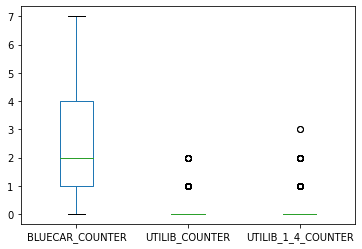

In [156]:
#We already know from carrying out unique() tests in 
#our car columns that our data is within range and as expected.
#Anyhow just to confirm visually that this is the case we use a box plot
% matplotlib inline 

autolib_new.boxplot(column =['BLUECAR_COUNTER', 'UTILIB_COUNTER', 'UTILIB_1_4_COUNTER'], grid = False)
#bplot = sns.boxplot(y='lifeExp', x='continent', data=gapminder_2007, width=0.5, palette="colorblind")

Our boxplot avove confirms that theer are no outliers in our data. 

***Having done all the requisite Data Cleaning Operations, our data should be both valid and ready for analysis***